In [9]:
# Importing necessary libraries
# General Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# ML library
from sklearn import model_selection
from sklearn import metrics
# Data Balancing Library
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
# regression-multiple-methods.ipynb
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

### Loading Data and Data Summary

In [10]:
algorithms = {
    #'Logistic-Regression': LogisticRegression(multi_class='auto',random_state=42, max_iter=2000),
    # 'SVC-Linear': SVC(kernel='linear', probability=True,random_state=42),
    # 'SVC-RBF': SVC(kernel='rbf', probability=True,random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    # 'Neural-Network-5': MLPClassifier(hidden_layer_sizes=[5], max_iter=20000),
    # 'DecisionTree': DecisionTreeClassifier(random_state=42),
    # 'GradientBoosting': GradientBoostingClassifier(random_state=42),
    # 'KNeighbors': KNeighborsClassifier()
}
file_path = '../outputs/features_data_labelled.csv'
np.random.seed(42)
# load the dataset


In [11]:
def trainAndTestWithSampling(X, y, model, model_name):
  # split into train/test sets with same class ratio
  trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42)

  # fit model
  model.fit(trainX, trainy)
  # predict on test set
  y_pred = model.predict(testX)
  # evaluate predictions
  # Accuracy
  print(f'***************************{model_name}********************************')
  print("Accuracy:", accuracy_score(testy, y_pred))
  print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
  print("\nClassification Report:\n", classification_report(testy, y_pred))
  return trainX, testX, trainy, testy

##Program Starting Here!

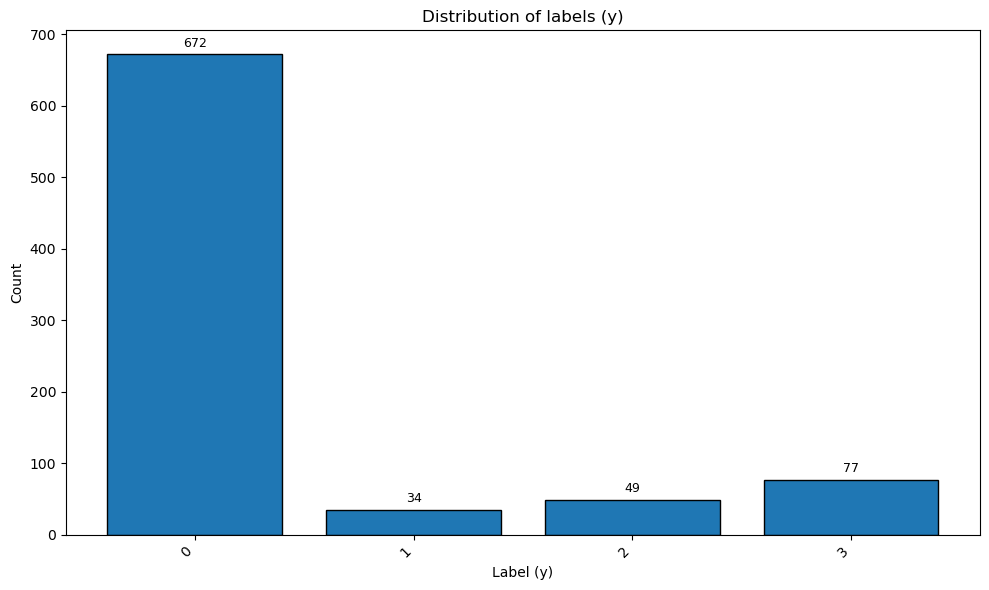

***************************RandomForest********************************
Accuracy: 0.8203592814371258

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 11   0   0   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       1.00      0.15      0.27        13

    accuracy                           0.82       167
   macro avg       0.45      0.29      0.29       167
weighted avg       0.74      0.82      0.75       167



c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
df = pd.read_csv(file_path)
df_clean = df.dropna()
X = df_clean.drop(columns=['image',	'tile_i','tile_j','y'])
y = df_clean['y']

counts = df_clean['y'].value_counts().sort_index()   # or .sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(counts.index.astype(str), counts.values, color='tab:blue', edgecolor='k')
plt.xlabel('Label (y)')
plt.ylabel('Count')
plt.title('Distribution of labels (y)')
plt.xticks(rotation=45, ha='right')

# annotate counts on top of each bar
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + max(counts.values)*0.01, f'{int(h)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


for model_name, algorithm in algorithms.items():
    trainX, testX, trainy, testy = trainAndTestWithSampling(X,y,algorithm, model_name)


## PCA Program Starting Here!

In [13]:

def train_and_evaluate_with_pca(X,y,n_pcs_list):
    # Ensure X only contains the features you want to analyze with PCA

    # --- PCA Process ---
    pca_results = pd.DataFrame(columns=['Model', 'Features', 'classification_report'])
    # Step 1: Standardize the data
    # PCA is affected by scale, so standardization (mean=0, variance=1) is crucial.
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Perform PCA
    # We use all components initially to analyze total variance contribution
    pca = PCA(n_components=None) # None keeps all original dimensions as PCs
    pca.fit(X_scaled)

    # Step 3: Extract explained variance ratios
    # The explained_variance_ratio_ attribute provides the percentage of variance 
    # explained by each individual principal component.
    explained_variance = pca.explained_variance_ratio_
    
    #Draw cummulative variance plot and explain 90% variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance) * 100, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.axhline(y=90, color='r', linestyle='--', label='90% Explained Variance')
    plt.axvline(x=np.argmax(np.cumsum(explained_variance) >= 0.9) + 1, color='g', linestyle='--', label='Number of PCs for 90% Variance')
    plt.legend()
    plt.grid()
    plt.show()
   

    # --- Plotting the Contributions (Bar Chart) ---
    # plt.figure(figsize=(10, 6))
    # # Create labels for the X-axis (PC1, PC2, PC3, ...)
    # pc_labels = [f"PC{i+1}" for i in range(len(explained_variance))]

    # # Plotting the bar chart
    # plt.bar(pc_labels, explained_variance * 100, color='skyblue', edgecolor='black')
    # # Adding labels and title
    # plt.xlabel('Principal Component')
    # plt.ylabel('Percentage of Explained Variance (%)')
    # plt.title('Contribution of Each Principal Component to Total Variance')
    # plt.xticks(rotation=45)
    # plt.grid(axis='y', linestyle='--')

    for n_pcs in n_pcs_list:
        pca_n = PCA()
        X_pca = pca_n.fit_transform(X_scaled)
        X_pca_subset = X_pca[:, :n_pcs]  # Select the first `n_pcs` PCs
        print(f"\nUsing top {n_pcs} principal components:")
        print(f"Original dimensions: {X_scaled.shape[1]}")
        print(f"Reduced dimensions: {X_pca_subset.shape[1]}")
        np.random.seed(5)
        # split into train/test sets with same class ratio
        trainX, testX, trainy, testy = model_selection.train_test_split(X_pca_subset, y, test_size=0.2,random_state=42)

        for model_name, model in algorithms.items():
            # Train the model
            model.fit(trainX, trainy)
            y_pred = model.predict(testX)
            # evaluate predictions
            # Accuracy
            print("Accuracy:", accuracy_score(testy, y_pred))
            print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
            print("\nClassification Report:\n", classification_report(testy, y_pred))
            # Store results
            pca_results.loc[len(pca_results)] = {
                'Model': model_name,
                'Features': f'{n_pcs} PCs',
                'classification_report': classification_report(testy, y_pred)
            }
     # Train and evaluate models using original features
    trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    for model_name, model in algorithms.items():
        model.fit(trainX, trainy)

        y_pred = model.predict(testX)
            # evaluate predictions
            # Accuracy
        print("Accuracy:", accuracy_score(testy, y_pred))
        print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
        print("\nClassification Report:\n", classification_report(testy, y_pred))

        # Store results
        pca_results.loc[len(pca_results)] = {
                'Model': model_name,
                'Features': f'{n_pcs} PCs',
                'classification_report': classification_report(testy, y_pred)
            }
    return pca_results
    

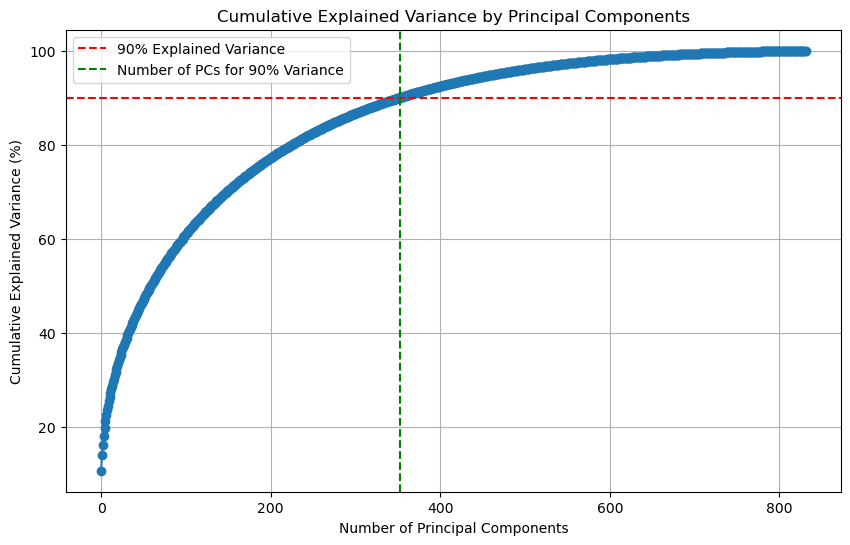


Using top 300 principal components:
Original dimensions: 3290
Reduced dimensions: 300
Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.81       167
   macro avg       0.20      0.25      0.22       167
weighted avg       0.65      0.81      0.72       167



c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr


Using top 350 principal components:
Original dimensions: 3290
Reduced dimensions: 350
Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.81       167
   macro avg       0.20      0.25      0.22       167
weighted avg       0.65      0.81      0.72       167



c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr


Using top 400 principal components:
Original dimensions: 3290
Reduced dimensions: 400
Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.81       167
   macro avg       0.20      0.25      0.22       167
weighted avg       0.65      0.81      0.72       167



c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr


Using top 450 principal components:
Original dimensions: 3290
Reduced dimensions: 450
Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.81       167
   macro avg       0.20      0.25      0.22       167
weighted avg       0.65      0.81      0.72       167



c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr

Accuracy: 0.8203592814371258

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 11   0   0   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       1.00      0.15      0.27        13

    accuracy                           0.82       167
   macro avg       0.45      0.29      0.29       167
weighted avg       0.74      0.82      0.75       167

          Model Features                              classification_report
0  RandomForest  300 PCs                precision    recall  f1-score   ...
1  RandomForest  350 PCs                precision    recall  f1-score   ...
2  RandomForest  400 PCs                precision    recall  f1-score   ...
3  RandomForest  450 PCs                precision    recall  f1-score   ...
4  RandomForest  450 PCs          

c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr

In [14]:
n_pcs_list = [300, 350, 400, 450]
df = pd.read_csv(file_path)
df_clean = df.dropna()
X = df_clean.drop(columns=['image',	'tile_i','tile_j','y'])
y = df_clean['y']
pca_results = train_and_evaluate_with_pca(X,y, n_pcs_list)
print(pca_results)
print("----------------------------------------------------------------\n\n")

In [16]:
# ML library
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import linear_model

# Data Balancing Library
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN


In [18]:
# Train and test model

def trainAndTest(X, y, strategy, use_strag):
  np.random.seed(5)
  # split into train/test sets with same class ratio
  trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

  #Apply sampling technique if any
  if use_strag:
    trainX, trainy = strategy.fit_resample(trainX, trainy)
  # define model
 # model = linear_model.LogisticRegression(solver='liblinear')
  model = RandomForestClassifier(random_state=42)
  # fit model
  model.fit(trainX, trainy)
  # predict on test set
  yhat = model.predict(testX)
  # evaluate predictions
  acc = metrics.accuracy_score(testy, yhat)
  prec = metrics.precision_score(testy, yhat, average='weighted')
  recall = metrics.recall_score(testy, yhat, average='weighted')
  f1_score = metrics.f1_score(testy, yhat, average='weighted')
  # Get classification report as dict for class-wise metrics
  report_dict = metrics.classification_report(testy, yhat, output_dict=True)

  return trainX, trainy, acc, prec, recall, f1_score, report_dict

In [25]:
def technique(X,y):

  # summarize class distribution
  print("Original :",Counter(y))

  ### Step 1: Evaluate original data
  X_orig, y_orig, acc_orig, prec_orig, recall_orig, f1_orig, report_orig = trainAndTest(X, y, False, False)

  ### Step 2: Random Undersampling on class 0
  rus = RandomUnderSampler(sampling_strategy={0: len(y[y != 0])}, random_state=42)
  X_rus, y_rus = rus.fit_resample(X, y)
  print("\nAfter Random Undersampling on class 0:", Counter(y_rus))

  ### Step 3: Apply other techniques to the undersampled data
  ### TomekLinks
  # undersample = TomekLinks()

  ### SMOTE - for multiclass, use 'not majority' or dict
  oversample = SMOTE(sampling_strategy='not majority', random_state=42)

  ### SMOTEENN - for multiclass, use 'not majority' or dict
  # sample = SMOTEENN(sampling_strategy='not majority', random_state=42)

  ### Evaluation - using undersampled data as base
  X_base, y_base, acc_rus, prec_rus, recall_rus, f1_rus, report_rus = trainAndTest(X_rus, y_rus, False, False)
  # X_tomelink, y_tomelink, acc_tomelink, prec_tomelink, recall_tomelink, f1_tomelink, report_tomelink = trainAndTest(X_rus, y_rus, undersample, True)
  X_smote, y_smote, acc_smote, prec_smote, recall_smote, f1_smote, report_smote = trainAndTest(X_rus, y_rus, oversample, True)
  # X_smoteenn, y_smoteenn, acc_smoteenn, prec_smoteenn, recall_smoteenn, f1_smoteenn, report_smoteenn = trainAndTest(X_rus, y_rus, sample, True)

  df_result = pd.DataFrame({
    'Accuracy': [acc_orig, acc_rus, acc_smote],
    'Precision': [prec_orig, prec_rus, prec_smote],
    'Recall': [recall_orig, recall_rus, recall_smote],
    'F1_score': [f1_orig, f1_rus, f1_smote]
  })

  # df_result.index = ['Original Data', 'Random Undersampling (class 0)', 'RUS + TomekLinks', 'RUS + SMOTE', 'RUS + SMOTEENN']
  df_result.index = ['Original Data', 'Random Undersampling (class 0)', 'RUS + SMOTE']

  ### Plotting - Class distribution

  fig, ax = plt.subplots(1, 3, figsize=(15, 10))

  ax[0, 0].bar(y.value_counts().index.astype(str), y.value_counts().values)
  ax[0, 0].set_title("Original Data Distribution")
  ax[0, 1].bar(y_rus.value_counts().index.astype(str), y_rus.value_counts().values)
  ax[0, 1].set_title("After Random Undersampling (class 0)")
  # ax[0, 2].bar(y_tomelink.value_counts().index.astype(str), y_tomelink.value_counts().values)
  # ax[0, 2].set_title("RUS + TomekLinks")
  ax[0, 2].bar(y_smote.value_counts().index.astype(str), y_smote.value_counts().values)
  ax[0, 2].set_title("RUS + SMOTE")
  # ax[1, 1].bar(y_smoteenn.value_counts().index.astype(str), y_smoteenn.value_counts().values)
  # ax[1, 1].set_title("RUS + SMOTEENN")
  # ax[1, 2].axis('off')
  
  plt.tight_layout()
  plt.show()

  ### Plotting - Feature scatter plots

  fig, ax = plt.subplots(1, 3, figsize=(15, 10))

  ax[0, 0].scatter(X.iloc[:, 0], X.iloc[:, 2], c = y)
  ax[0, 0].set_title("Original Data")
  ax[0, 1].scatter(X_rus.iloc[:, 0], X_rus.iloc[:, 2], c = y_rus)
  ax[0, 1].set_title("After Random Undersampling")
  # ax[0, 2].scatter(X_tomelink.iloc[:, 0], X_tomelink.iloc[:, 2], c = y_tomelink)
  # ax[0, 2].set_title("After RUS + TomekLinks")
  ax[0, 2].scatter(X_smote.iloc[:, 0], X_smote.iloc[:, 2], c = y_smote)
  ax[0, 2].set_title("After RUS + SMOTE")
  # ax[1, 1].scatter(X_smoteenn.iloc[:, 0], X_smoteenn.iloc[:, 2], c = y_smoteenn)
  # ax[1, 1].set_title("After RUS + SMOTEENN")
  # ax[1, 2].axis('off')

  plt.tight_layout()
  plt.show()

  # Store classification reports for later use
  all_reports = {
    'Original Data': report_orig,
    'Random Undersampling (class 0)': report_rus,
    # 'RUS + TomekLinks': report_tomelink,
    'RUS + SMOTE': report_smote
    # 'RUS + SMOTEENN': report_smoteenn
  }

  return df_result, all_reports


Original : Counter({0: 672, 3: 77, 2: 49, 1: 34})


c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classifi


After Random Undersampling on class 0: Counter({0: 160, 3: 77, 2: 49, 1: 34})


c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

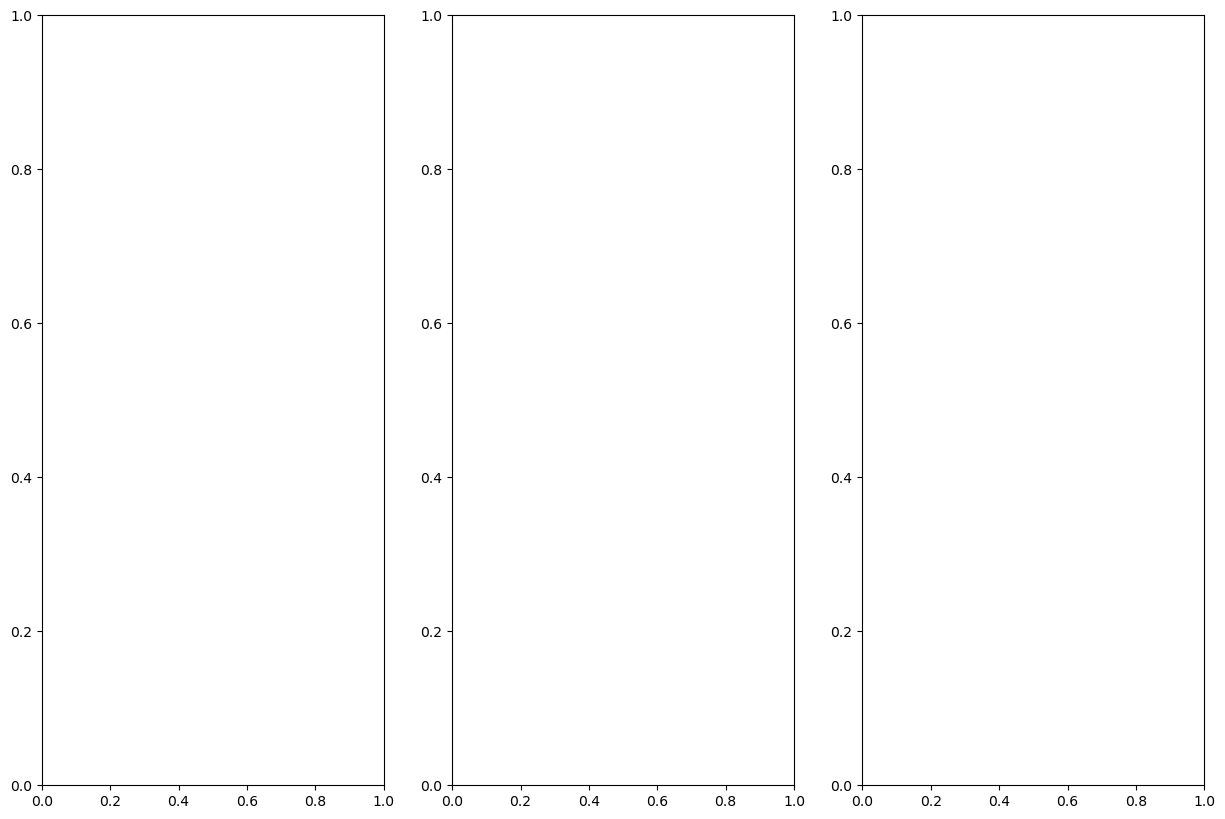

In [26]:
result, all_reports = technique(X,y)



OVERALL PERFORMANCE METRICS SUMMARY
                                Accuracy  Precision    Recall  F1_score
Original Data                   0.820359   0.751225  0.820359  0.748679
Random Undersampling (class 0)  0.578125   0.435192  0.578125  0.495472
RUS + TomekLinks                0.593750   0.443274  0.593750  0.505583
RUS + SMOTE                     0.625000   0.619022  0.625000  0.621074
RUS + SMOTEENN                  0.218750   0.113762  0.218750  0.147727


BEST PERFORMERS BY METRIC
Best Accuracy: Original Data with 0.8204
Best Precision: Original Data with 0.7512
Best Recall: Original Data with 0.8204
Best F1-Score: Original Data with 0.7487

CLASS-WISE DETAILED METRICS


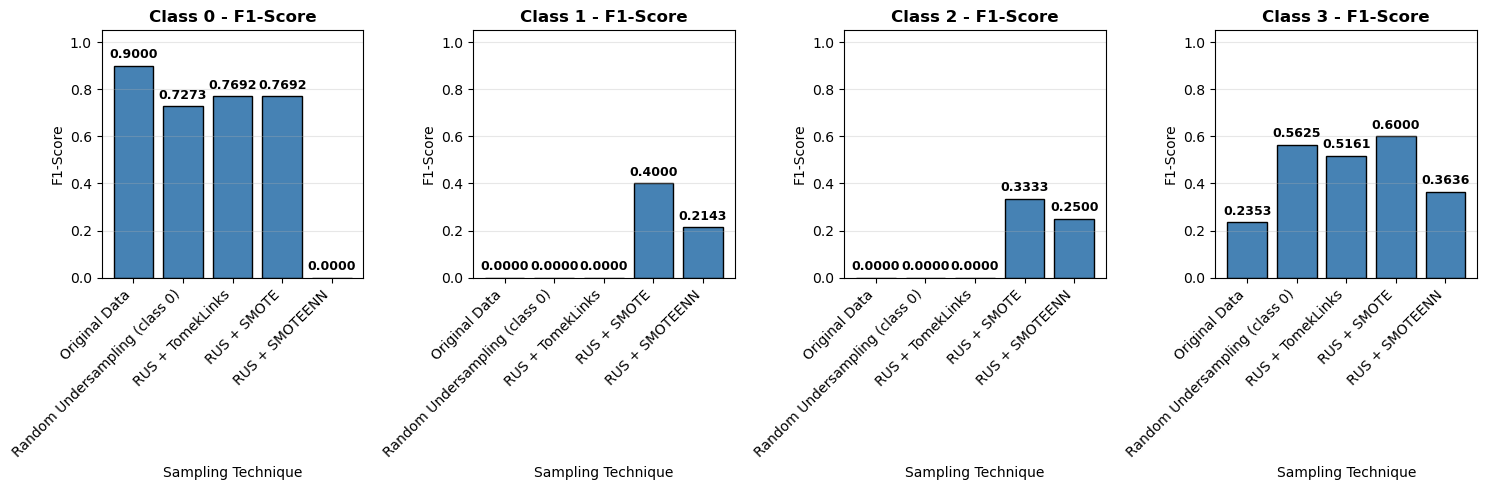


CLASS-WISE F1-SCORE IMPROVEMENT

Class 0:
  Random Undersampling (class 0): F1=0.7273 (Baseline: 0.9000) | Improvement: -19.19%
  RUS + TomekLinks: F1=0.7692 (Baseline: 0.9000) | Improvement: -14.53%
  RUS + SMOTE: F1=0.7692 (Baseline: 0.9000) | Improvement: -14.53%
  RUS + SMOTEENN: F1=0.0000 (Baseline: 0.9000) | Improvement: -100.00%

Class 1:
  Random Undersampling (class 0): F1=0.0000 (Baseline: 0.0000) | Improvement: +0.00%
  RUS + TomekLinks: F1=0.0000 (Baseline: 0.0000) | Improvement: +0.00%
  RUS + SMOTE: F1=0.4000 (Baseline: 0.0000) | Improvement: +0.00%
  RUS + SMOTEENN: F1=0.2143 (Baseline: 0.0000) | Improvement: +0.00%

Class 2:
  Random Undersampling (class 0): F1=0.0000 (Baseline: 0.0000) | Improvement: +0.00%
  RUS + TomekLinks: F1=0.0000 (Baseline: 0.0000) | Improvement: +0.00%
  RUS + SMOTE: F1=0.3333 (Baseline: 0.0000) | Improvement: +0.00%
  RUS + SMOTEENN: F1=0.2500 (Baseline: 0.0000) | Improvement: +0.00%

Class 3:
  Random Undersampling (class 0): F1=0.5625 (Base

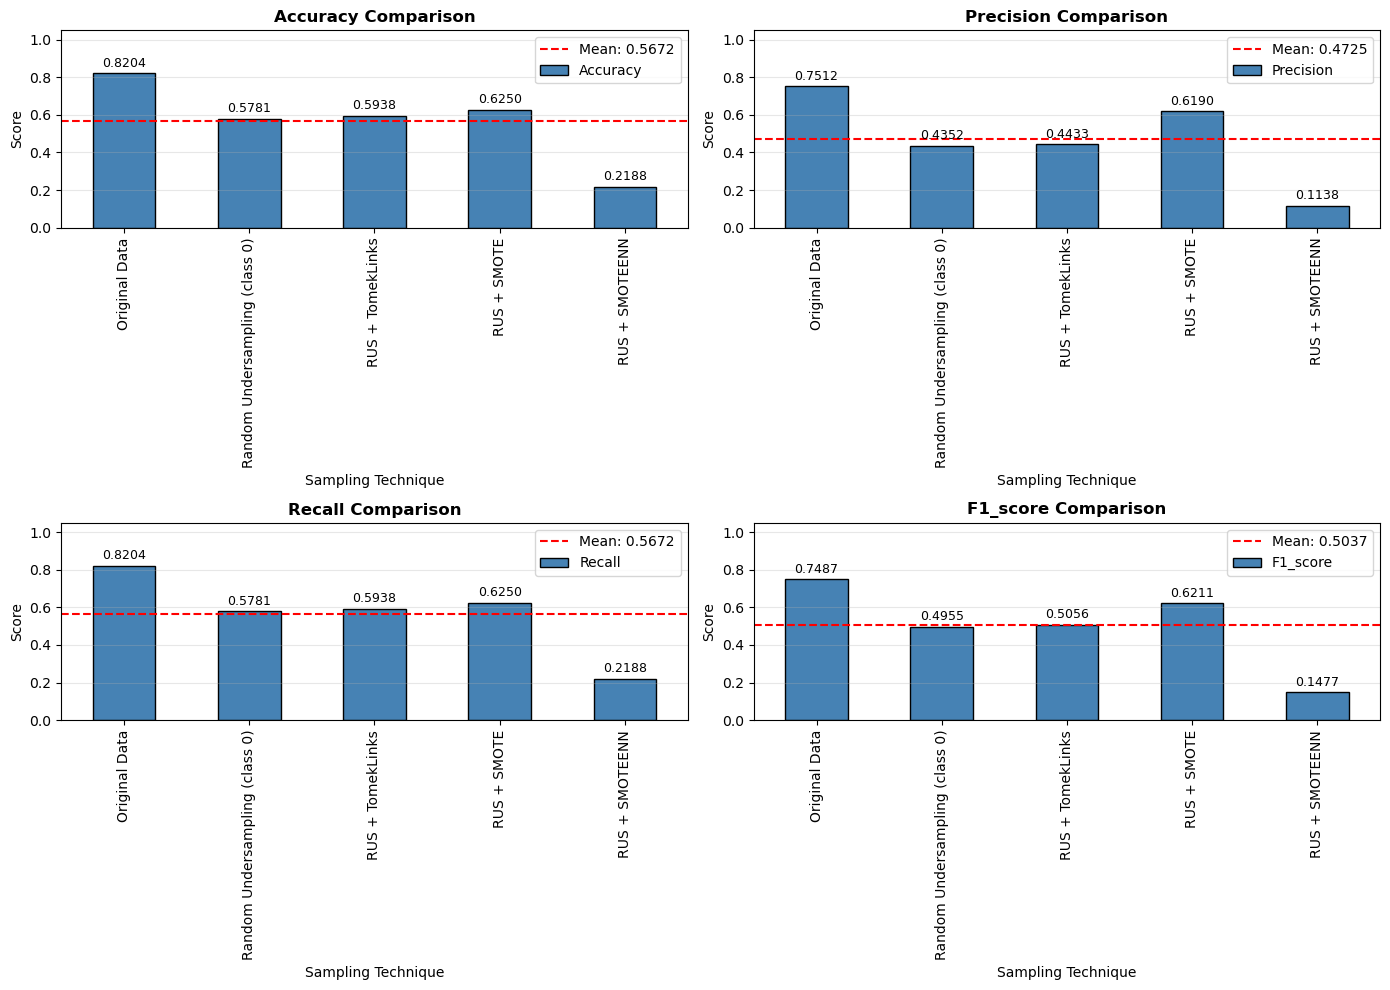

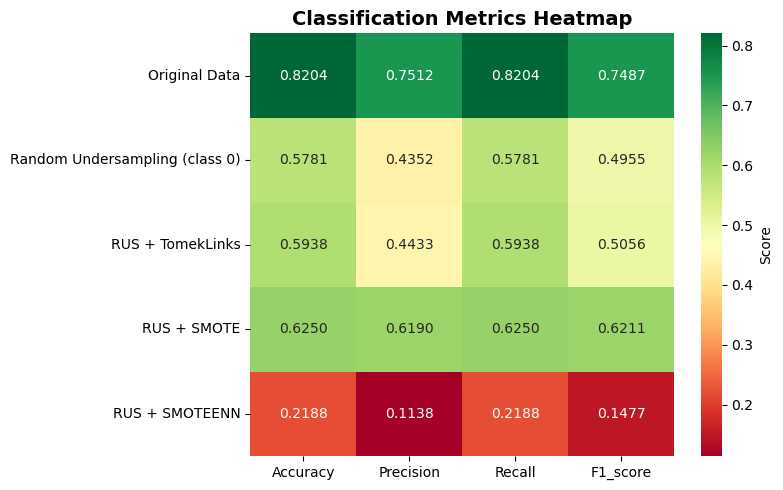

In [11]:
# Display the results summary table
print("\n" + "="*80)
print("OVERALL PERFORMANCE METRICS SUMMARY")
print("="*80)
print(result)
print("\n")

# Extract the best performer for each metric (with safety checks)
print("="*80)
print("BEST PERFORMERS BY METRIC")
print("="*80)
if len(result) > 0:
    print(f"Best Accuracy: {result['Accuracy'].idxmax()} with {result['Accuracy'].max():.4f}")
    print(f"Best Precision: {result['Precision'].idxmax()} with {result['Precision'].max():.4f}")
    print(f"Best Recall: {result['Recall'].idxmax()} with {result['Recall'].max():.4f}")
    print(f"Best F1-Score: {result['F1_score'].idxmax()} with {result['F1_score'].max():.4f}")
else:
    print("No results available")

# ========== CLASS-WISE METRICS ANALYSIS ==========
print("\n" + "="*80)
print("CLASS-WISE DETAILED METRICS")
print("="*80)

# Extract class-wise F1-scores and other metrics for comparison
class_wise_metrics = {}
for technique_name, report in all_reports.items():
    class_wise_metrics[technique_name] = {}
    # Get all classes from report (excluding 'accuracy', 'macro avg', 'weighted avg')
    for class_label in sorted([k for k in report.keys() if k not in ['accuracy', 'macro avg', 'weighted avg']]):
        try:
            class_label_int = int(float(class_label))
            class_wise_metrics[technique_name][class_label_int] = {
                'precision': report[class_label]['precision'],
                'recall': report[class_label]['recall'],
                'f1-score': report[class_label]['f1-score'],
                'support': int(report[class_label]['support'])
            }
        except:
            pass

# Create visualization for class-wise F1-scores
unique_classes = sorted(list(set().union(*[set(m.keys()) for m in class_wise_metrics.values()])))

if len(unique_classes) > 0:
    fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 5))
    if len(unique_classes) == 1:
        axes = [axes]

    for idx, class_label in enumerate(unique_classes):
        f1_scores = []
        techniques = []
        for technique_name in all_reports.keys():
            if class_label in class_wise_metrics[technique_name]:
                f1_scores.append(class_wise_metrics[technique_name][class_label]['f1-score'])
                techniques.append(technique_name)
        
        ax = axes[idx]
        bars = ax.bar(range(len(techniques)), f1_scores, color='steelblue', edgecolor='black')
        ax.set_title(f'Class {int(class_label)} - F1-Score', fontsize=12, fontweight='bold')
        ax.set_ylabel('F1-Score', fontsize=10)
        ax.set_xlabel('Sampling Technique', fontsize=10)
        ax.set_xticks(range(len(techniques)))
        ax.set_xticklabels(techniques, rotation=45, ha='right')
        ax.set_ylim([0, 1.05])
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, score) in enumerate(zip(bars, f1_scores)):
            ax.text(i, score + 0.02, f'{score:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Create a comprehensive class-wise comparison table
    print("\n" + "="*80)
    print("CLASS-WISE F1-SCORE IMPROVEMENT")
    print("="*80)
    for class_label in unique_classes:
        print(f"\nClass {int(class_label)}:")
        # Use original data as baseline for comparison
        baseline_technique = 'Original Data'
        baseline_f1 = class_wise_metrics[baseline_technique][class_label]['f1-score'] if class_label in class_wise_metrics[baseline_technique] else 0
        
        for technique_name in ['Random Undersampling (class 0)', 'RUS + TomekLinks', 'RUS + SMOTE', 'RUS + SMOTEENN']:
            if technique_name in class_wise_metrics and class_label in class_wise_metrics[technique_name]:
                current_f1 = class_wise_metrics[technique_name][class_label]['f1-score']
                improvement = ((current_f1 - baseline_f1) / baseline_f1 * 100) if baseline_f1 != 0 else 0
                print(f"  {technique_name}: F1={current_f1:.4f} (Baseline: {baseline_f1:.4f}) | Improvement: {improvement:+.2f}%")
else:
    print("No class-wise metrics available")

# Visualize the metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1_score']
for idx, metric in enumerate(metrics_list):
    ax = axes[idx // 2, idx % 2]
    result[metric].plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.set_xlabel('Sampling Technique', fontsize=10)
    ax.set_ylim([0, 1.05])
    ax.grid(axis='y', alpha=0.3)
    ax.axhline(y=result[metric].mean(), color='red', linestyle='--', label=f'Mean: {result[metric].mean():.4f}')
    ax.legend()
    
    # Add value labels on bars
    for i, v in enumerate(result[metric].values):
        ax.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Create a heatmap for better visualization
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(result, annot=True, fmt='.4f', cmap='RdYlGn', cbar_kws={'label': 'Score'}, ax=ax)
ax.set_title('Classification Metrics Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
